In [1]:
import os
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import collections
import matplotlib.pyplot as plt

#Model taken from https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/


In [36]:
## Import and prepare data

df=pd.read_csv('data_full.csv')

#print(df) #Uncomment to see imported data


In [37]:
## Features taken from Ruben's NN model + baseline + others

proteins = df['protein']

X = df.drop(['tm'], axis=1)
Y = df['tm']


for index, row in X.iterrows():
    sequence = row[1]
    counts = collections.Counter(sequence)
    
    # add (E + K)/(Q + H) ratio feature
    if (counts['Q'] + counts['H']) != 0:
        df.at[index, '(E + K)/(Q + H)'] = (counts['E'] + counts['K']) /(counts['Q'] + counts['H'])
    else:
        df.at[index, '(E + K)/(Q + H)'] = 0   
    
    # Length feature
    df.at[index, 'Length'] = len(sequence)
    
# Individual counts for each aminoacid features
for i in range(len(df.index)):
    counter = collections.Counter(df.iloc[i, 2])
    for key in counter.keys():
        df.at[i, key] = counter[key]

df = df.fillna(0)

#print(df)


In [38]:
X = df[['Length']].values
y = df['tm'].values

In [40]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(X,y)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
y_pred = regressor.predict(302.)


ValueError: Expected 2D array, got scalar array instead:
array=302.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

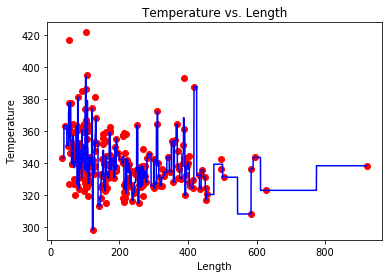

In [34]:

# arange for creating a range of values  
# from min value of X to max value of X  
# with a difference of 0.01 between two 
# consecutive values 
X_grid = np.arange(min(X), max(X), 0.01) 
  
# reshape for reshaping the data into  
# a len(X_grid)*1 array, i.e. to make 
# a column out of the X_grid values 
X_grid = X_grid.reshape((len(X_grid), 1))  
  
# scatter plot for original data 
plt.scatter(X, y, color = 'red') 
  
# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')  
  
# specify title 
plt.title('Temperature vs. Length')  
  
# specify X axis label 
plt.xlabel('Length') 
  
# specify Y axis label 
plt.ylabel('Temperature') 
  
# show the plot 
plt.show() 


In [35]:

# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regressor, out_file ='tree.dot', 
               feature_names =['Production Cost'])  

